<a href="https://colab.research.google.com/github/Cristiannn1711/Proyecto_final/blob/main/Te_damos_la_bienvenida_a_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from google.colab import files
upload = files.upload()


Saving Riles.xlsx to Riles.xlsx


In [64]:
pip install pandas matplotlib seaborn scipy statsmodels

Estadísticas descriptivas:
                     Fecha  Consumo_agua_dulce  Riles_tratados      Ton_PT
count                  175          175.000000      173.000000  175.000000
mean   2025-02-13 00:00:00          798.548571     1186.017341   92.951142
min    2024-11-18 00:00:00            0.000000        0.000000    0.000000
25%    2024-12-31 12:00:00          482.000000      660.000000    5.371340
50%    2025-02-13 00:00:00          778.000000     1328.000000  101.695775
75%    2025-03-28 12:00:00         1216.500000     1757.000000  150.999163
max    2025-05-11 00:00:00         2065.000000     2349.000000  217.444105
std                    NaN          452.616832      692.831463   70.946770


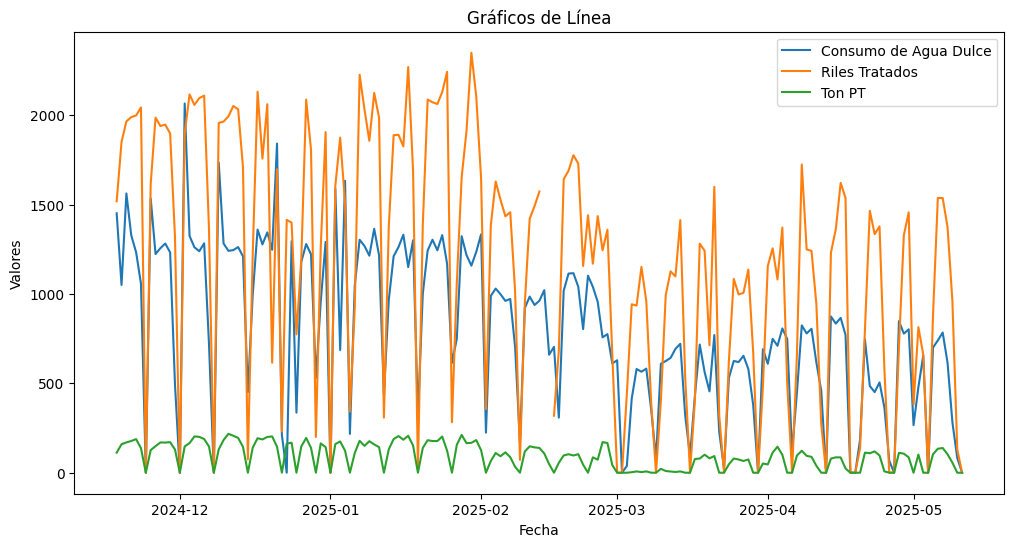

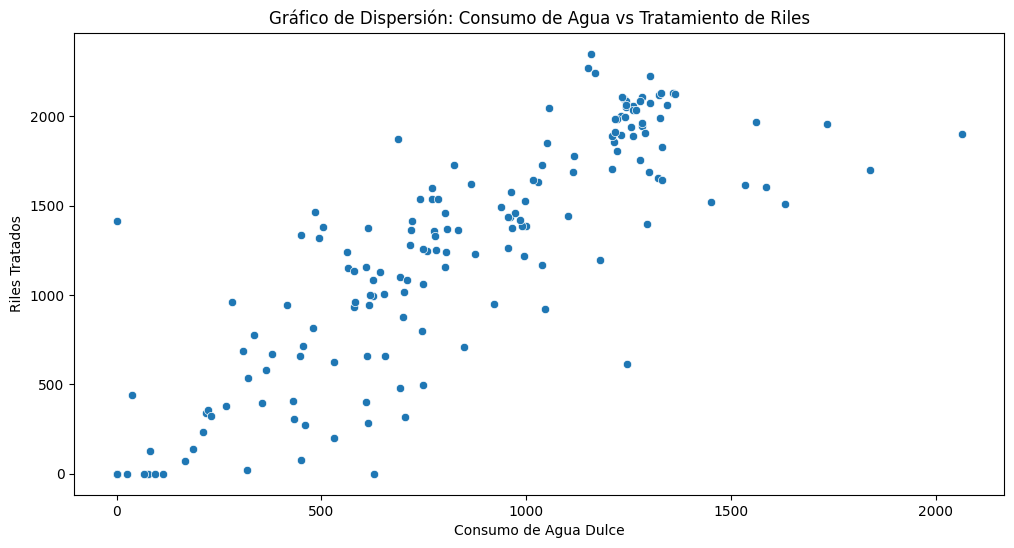

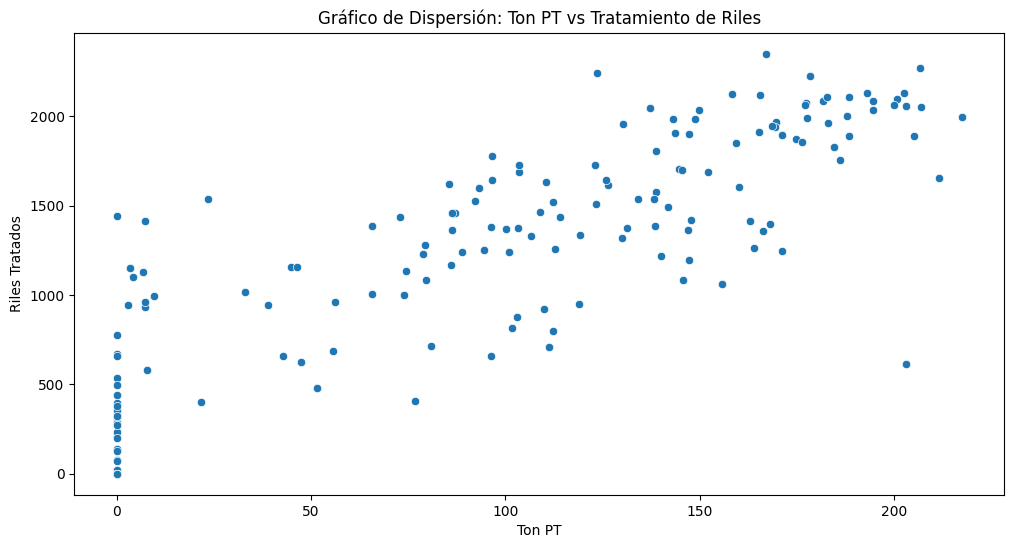

ANOVA:
                             sum_sq     df         F    PR(>F)
C(Consumo_agua_dulce)  8.046949e+07  153.0  3.511813  0.000767
Residual               3.145051e+06   21.0       NaN       NaN
ANCOVA:
                          sum_sq     df          F        PR(>F)
Consumo_agua_dulce  7.216956e+06    1.0  81.405367  3.820640e-16
Ton_PT              6.605577e+06    1.0  74.509175  4.184135e-15
Residual            1.507127e+07  170.0        NaN           NaN


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 153, but rank is 151
  warnings.warn('covariance of constraints does not have full '


In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx')

# Análisis de datos estadísticos
print("Estadísticas descriptivas:")
print(df.describe())

# Gráficos de línea para visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(df['Fecha'], df['Consumo_agua_dulce'], label='Consumo de Agua Dulce')
plt.plot(df['Fecha'], df['Riles_tratados'], label='Riles Tratados')
plt.plot(df['Fecha'], df['Ton_PT'], label='Ton PT')
plt.xlabel('Fecha')
plt.ylabel('Valores')
plt.title('Gráficos de Línea')
plt.legend()
plt.show()

# Gráficos de dispersión consumo agua vs tratamiento de riles
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Consumo_agua_dulce', y='Riles_tratados', data=df)
plt.xlabel('Consumo de Agua Dulce')
plt.ylabel('Riles Tratados')
plt.title('Gráfico de Dispersión: Consumo de Agua vs Tratamiento de Riles')
plt.show()

# Gráficos de dispersión ton PT vs tratamiento de riles
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Ton_PT', y='Riles_tratados', data=df)
plt.xlabel('Ton PT')
plt.ylabel('Riles Tratados')
plt.title('Gráfico de Dispersión: Ton PT vs Tratamiento de Riles')
plt.show()

# ANOVA
model_anova = ols('Riles_tratados ~ C(Consumo_agua_dulce)', data=df).fit()
anova_table = sm.stats.anova_lm(model_anova, typ=2)
print("ANOVA:")
print(anova_table)

# ANCOVA
model_ancova = ols('Riles_tratados ~ Consumo_agua_dulce + Ton_PT', data=df).fit()
ancova_table = sm.stats.anova_lm(model_ancova, typ=2)
print("ANCOVA:")
print(ancova_table)


In [90]:
import pandas as pd
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx', engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Definir la función de predicción
def predecir_tratamiento_riles(consumo_agua, ton_pt):
    # Definir el modelo de regresión lineal
    X = df[['Consumo_agua_dulce', 'Ton_PT']]
    y = df['Riles_tratados']
    X = sm.add_constant(X)  # Agregar una constante al modelo

    # Ajustar el modelo
    modelo = sm.OLS(y, X).fit()

    # Crear un DataFrame con los valores de entrada
    nuevos_datos = pd.DataFrame({'const':[1.0], 'Consumo_agua_dulce': [consumo_agua], 'Ton_PT': [ton_pt]})

    # Realizar la predicción
    prediccion = modelo.predict(nuevos_datos)

    return prediccion

# Ejemplo de uso de la función de predicción
consumo_agua_ejemplo = 710
ton_pt_ejemplo = 146
prediccion = predecir_tratamiento_riles(consumo_agua_ejemplo, ton_pt_ejemplo)
print(f"Predicción del tratamiento de riles para un consumo de agua de {consumo_agua_ejemplo} y {ton_pt_ejemplo} toneladas de PT: {prediccion}")


Predicción del tratamiento de riles para un consumo de agua de 710 y 146 toneladas de PT: 0    1360.424944
dtype: float64


In [88]:
import pandas as pd
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx', engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Definir la función de predicción
def predecir_tratamiento_riles(consumo_agua, ton_pt):
    # Definir el modelo de regresión lineal
    X = df[['Consumo_agua_dulce', 'Ton_PT']]
    y = df['Riles_tratados']
    X = sm.add_constant(X)  # Agregar una constante al modelo

    # Ajustar el modelo
    modelo = sm.OLS(y, X).fit()

    # Crear un DataFrame con los valores de entrada
    nuevos_datos = pd.DataFrame({'const': [1.0], 'Consumo_agua_dulce': [consumo_agua], 'Ton_PT': [ton_pt]})

    # Realizar la predicción
    prediccion = modelo.predict(nuevos_datos)

    return prediccion

# Ejemplo de uso de la función de predicción
consumo_agua_ejemplo = 479
ton_pt_ejemplo = 102
prediccion = predecir_tratamiento_riles(consumo_agua_ejemplo, ton_pt_ejemplo)
print(f"Predicción del tratamiento de riles para un consumo de agua de {consumo_agua_ejemplo} y {ton_pt_ejemplo} toneladas de PT: {prediccion}")

Predicción del tratamiento de riles para un consumo de agua de 479 y 102 toneladas de PT: 0    989.229798
dtype: float64


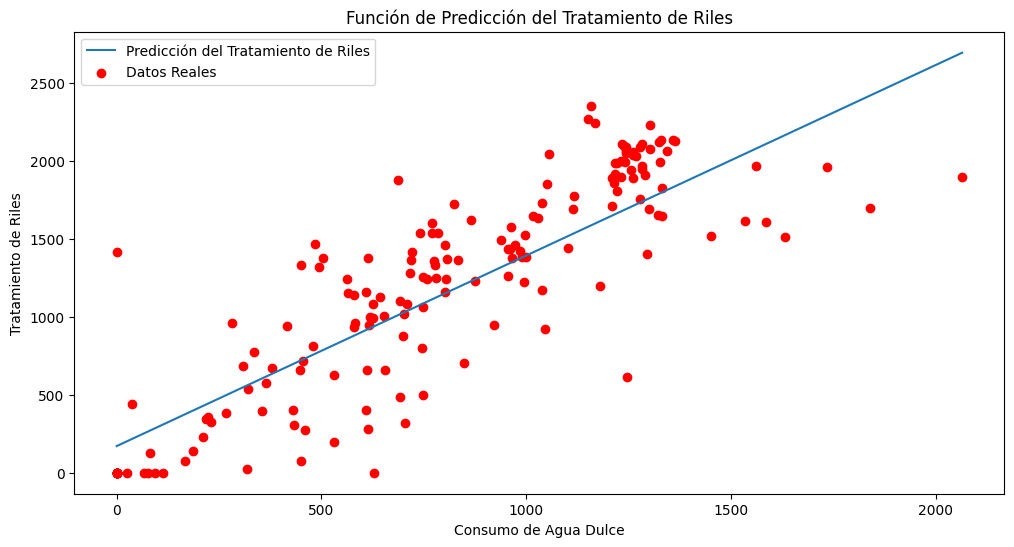

In [72]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx', engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Definir la función de predicción
def predecir_tratamiento_riles(consumo_agua, ton_pt):
    # Definir el modelo de regresión lineal
    X = df[['Consumo_agua_dulce', 'Ton_PT']]
    y = df['Riles_tratados']
    X = sm.add_constant(X)  # Agregar una constante al modelo

    # Ajustar el modelo
    modelo = sm.OLS(y, X).fit()

    # Crear un DataFrame con los valores de entrada
    nuevos_datos = pd.DataFrame({'const': [1.0], 'Consumo_agua_dulce': [consumo_agua], 'Ton_PT': [ton_pt]})

    # Realizar la predicción
    prediccion = modelo.predict(nuevos_datos)

    return prediccion
# Generar datos para graficar la función de predicción
consumo_agua_range = np.linspace(df['Consumo_agua_dulce'].min(), df['Consumo_agua_dulce'].max(), 100)
ton_pt_range = np.linspace(df['Ton_PT'].min(), df['Ton_PT'].max(), 100)
predicciones = np.array([predecir_tratamiento_riles(ca, tp) for ca, tp in zip(consumo_agua_range, ton_pt_range)])

# Graficar la función de predicción
plt.figure(figsize=(12, 6))
plt.plot(consumo_agua_range, predicciones, label='Predicción del Tratamiento de Riles')
plt.scatter(df['Consumo_agua_dulce'], df['Riles_tratados'], color='red', label='Datos Reales')
plt.xlabel('Consumo de Agua Dulce')
plt.ylabel('Tratamiento de Riles')
plt.title('Función de Predicción del Tratamiento de Riles')
plt.legend()
plt.show()


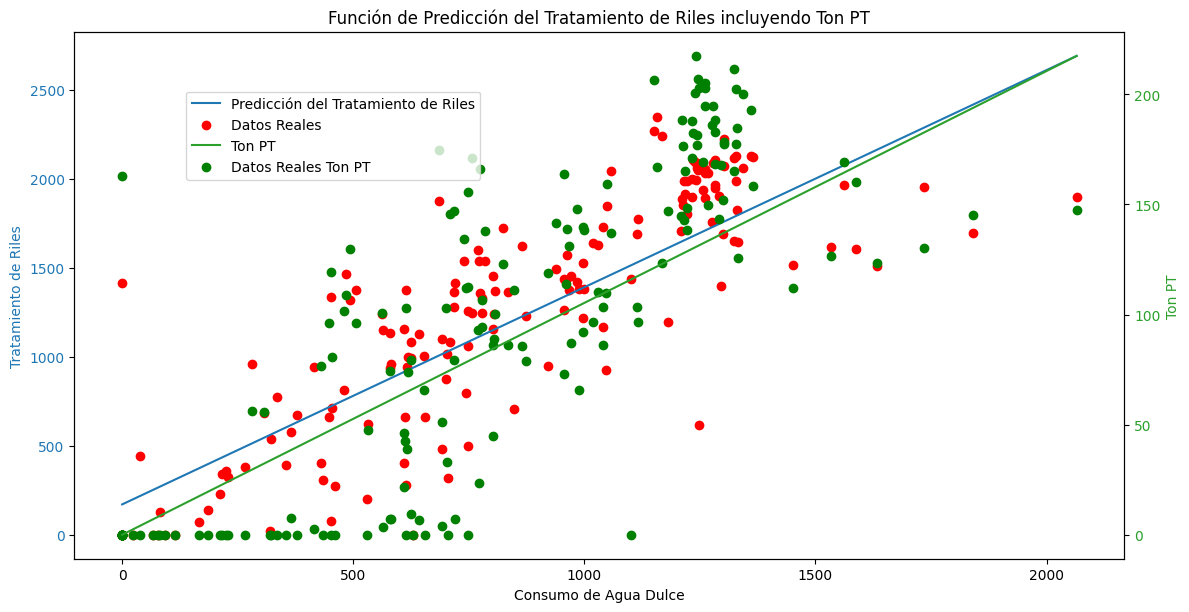

In [73]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx', engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Definir la función de predicción
def predecir_tratamiento_riles(consumo_agua, ton_pt):
    # Definir el modelo de regresión lineal
    X = df[['Consumo_agua_dulce', 'Ton_PT']]
    y = df['Riles_tratados']
    X = sm.add_constant(X)  # Agregar una constante al modelo

    # Ajustar el modelo
    modelo = sm.OLS(y, X).fit()

    # Crear un DataFrame con los valores de entrada
    nuevos_datos = pd.DataFrame({'const': [1.0], 'Consumo_agua_dulce': [consumo_agua], 'Ton_PT': [ton_pt]})

    # Realizar la predicción
    prediccion = modelo.predict(nuevos_datos)

    return prediccion

# Generar datos para graficar la función de predicción
consumo_agua_range = np.linspace(df['Consumo_agua_dulce'].min(), df['Consumo_agua_dulce'].max(), 100)
ton_pt_range = np.linspace(df['Ton_PT'].min(), df['Ton_PT'].max(), 100)
predicciones = np.array([predecir_tratamiento_riles(ca, tp) for ca, tp in zip(consumo_agua_range, ton_pt_range)])

# Graficar la función de predicción incluyendo Ton_PT
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Consumo de Agua Dulce')
ax1.set_ylabel('Tratamiento de Riles', color=color)
ax1.plot(consumo_agua_range, predicciones, label='Predicción del Tratamiento de Riles', color=color)
ax1.scatter(df['Consumo_agua_dulce'], df['Riles_tratados'], color='red', label='Datos Reales')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instanciar un segundo eje que comparte el mismo eje x
color = 'tab:green'
ax2.set_ylabel('Ton PT', color=color)
ax2.plot(consumo_agua_range, ton_pt_range, label='Ton PT', color=color)
ax2.scatter(df['Consumo_agua_dulce'], df['Ton_PT'], color='green', label='Datos Reales Ton PT')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Ajustar el diseño para que se vea bien
plt.title('Función de Predicción del Tratamiento de Riles incluyendo Ton PT')
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9), bbox_transform=ax1.transAxes)
plt.show()


In [77]:
import pandas as pd
import statsmodels.api as sm

# Cargar los datos desde el archivo Excel
df = pd.read_excel('Riles.xlsx', engine='openpyxl')

# Eliminar filas con valores NaN
df = df.dropna()

# Definir la función de predicción y valorizar el tratamiento de riles
def predecir_valor_tratamiento_riles(consumo_agua, ton_pt, valor_ril=1900):
    # Definir el modelo de regresión lineal
    X = df[['Consumo_agua_dulce', 'Ton_PT']]
    y = df['Riles_tratados']
    X = sm.add_constant(X)  # Agregar una constante al modelo

    # Ajustar el modelo
    modelo = sm.OLS(y, X).fit()

    # Crear un DataFrame con los valores de entrada
    nuevos_datos = pd.DataFrame({'const': [1.0], 'Consumo_agua_dulce': [consumo_agua], 'Ton_PT': [ton_pt]})

    # Realizar la predicción
    prediccion = modelo.predict(nuevos_datos)

    # Valorizar el tratamiento de riles
    valor_tratamiento_riles = int(prediccion * valor_ril)

    return valor_tratamiento_riles

# Ejemplo de uso de la función de predicción y valorización
consumo_agua_ejemplo = 1500
ton_pt_ejemplo = 180
valor_prediccion = predecir_valor_tratamiento_riles(consumo_agua_ejemplo, ton_pt_ejemplo)
print(f"Valor del tratamiento de riles para un consumo de agua de {consumo_agua_ejemplo} y {ton_pt_ejemplo} toneladas de PT: {valor_prediccion}")


Valor del tratamiento de riles para un consumo de agua de 1500 y 180 toneladas de PT: 3992964


<ipython-input-77-9e6e4336e92b>:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  valor_tratamiento_riles = int(prediccion * valor_ril)
